# Machine Learning with Fashion-MNIST datasets
By: Wong Jia Hau (1500181)

## Loading the datasets
If you don't know how to load file in Python, no worries, because the author of this datasets have already provided a data loader for us. 
Let us use the provided loader.

In [ ]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

The loader does not only helps us to load the data into the kernel, it also help us to do the following:
 - flattening data ( for machine learning purpose )
 - partitioning data into training and testing set

In [211]:
print(X_train[0].shape)

(784,)


We can see that the shape of each data is a 1x784 matrix, so it is already flattenized.

In [238]:
x_train_len = len(X_train)
x_test_len = len(X_test)
total = x_train_len + x_test_len
print("Number of training data is", x_train_len)
print("Number of testing data is", x_test_len)
print("Total number of data is ", total)
training_data_percentage = (x_train_len/total*100)
testing_data_percentage = 100 - training_data_percentage
print(f"So there are {training_data_percentage:2.3}% of data is training data")
print(f"And {testing_data_percentage:2.3}% of data is testing data")

Number of training data is 60000
Number of testing data is 10000
Total number of data is  70000
So there are 85.7% of data is training data
And 14.3% of data is testing data


## Let's define the benchmarking function
After that we can use this benchmarking function to benchmark various classifiers to see their accuracy, training time and predicting performance.

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def get_accuracy(predicted, actual):
    accuracy = (predicted == actual).sum() / len(actual) * 100
    return accuracy

def benchmark(classifier):
    from datetime import datetime
    time1 = datetime.now()
    cls = classifier()
    name = cls.__class__.__name__
    cls.fit(X_train, y_train)
    time2 = datetime.now()
    training_time = time2 - time1
    predicted = cls.predict(X_test)
    time3 = datetime.now()
    predicting_time = time3 - time2
    accuracy = get_accuracy(predicted, y_test)
    return {
        "classifier" : name,
        "training_time" : training_time, 
        "predicting_time" :predicting_time, 
        "accuracy" : accuracy
    }

def print_benchmark_result(result):
    print("Training data using ", result["classifier"])
    print("Time elapsed for training   = ", result["training_time"])
    print("Time elapsed for prediction = ", result["predicting_time"])
    print(f"Accuracy of is {result['accuracy']}%")

# Visualizing the data
As mentioned in README, all data are in 28x28 pixels, therefore we need to reshape the data into (28, 28).

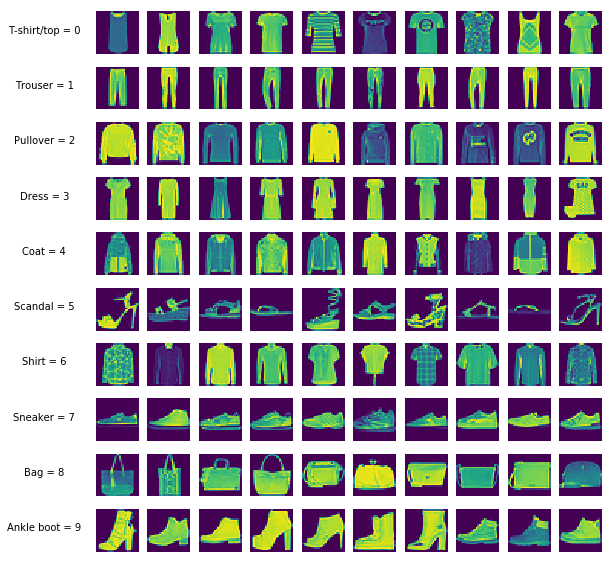

In [40]:
# The lables can be obtain from README.md
LABELS = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Scandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

label_indexes = []
for i in range(0, 10):
    label_indexes.append(
        [index for index, value in enumerate(y_train) if value == i]
    );
fig = plt.figure(figsize=(10, 10))
columns = 10 + 1
rows = 10
for i, labels in enumerate(label_indexes):
    for j in range(columns):
        ax = fig.add_subplot(rows, columns, i * columns + j + 1)
        ax.axes.xaxis.set_visible(False)
        ax.axes.yaxis.set_visible(False)
        ax.axis('off')
        if j == 0:
            ax.text(0, 0.5,  f'{LABELS[i]} = {i}', horizontalalignment='center')
            continue
        plt.imshow(X_train[labels[j]].reshape(28, 28))
plt.axis('off')
plt.show()


## The section below is just to test the API of sklearn classifier

In [194]:
# Train the classifier
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Note that `.predict()` method is expecting a `list`.  
And the output is also `list`.

In [23]:
original_label = y_test[0]
print("The original label is " , original_label)

predicted_label = neigh.predict([X_test[0]])
print("The predicted label is " , predicted_label)


The original label is  9
The predicted label is  [9]


In [207]:
predicted = neigh.predict(X_test[10:15])
print(predicted)

[4 5 5 3 4]


In [205]:
compared = (predicted == y_test[10:15])
print(compared)

[ True  True False  True  True]


**Note: False in the array means the prediction is wrong.  **  
So, by calculating the number of `True` in the `compared` array we can get the accuracy.

In [209]:
accuracy = compared.sum() / len(y_test[10:15])
print("Accuracy of KNeighbor(n=3) is ", (accuracy * 100))

Accuracy of KNeighbor(n=3) is  80.0


# Training using different classifier
In this section we will train the data using some popular classifier and benchmark their performance and accuracy.  
**NOTE** : We will use the default parameter for each classifier.

In [210]:
from sklearn.neighbors import KNeighborsClassifier
r_KNeighborsClassifier = benchmark(KNeighborsClassifier)
print_benchmark_result(r_KNeighborsClassifier)

Training data using  KNeighborsClassifier
Time elapsed for training   =  0:00:13.244634
Time elapsed for prediction =  0:12:07.213724
Accuracy of is 85.54%


In [90]:
from sklearn.tree import DecisionTreeClassifier
r_DecisionTreeClassifier = benchmark(DecisionTreeClassifier)
print_benchmark_result(r_DecisionTreeClassifier)

Training data using  DecisionTreeClassifier
Time elapsed for training   =  0:00:40.733167
Time elapsed for prediction =  0:00:00.016214
Accuracy of is 79.25999999999999%


In [54]:
from sklearn.naive_bayes import GaussianNB
r_GaussianNB = benchmark(GaussianNB)
print_benchmark_result(r_GaussianNB)

Training data using  GaussianNB
Time elapsed for training   =  0:00:00.639787
Time elapsed for prediction =  0:00:00.830691
Accuracy of is 58.56%


In [88]:
from sklearn.neural_network import MLPClassifier
r_MLPClassifier = benchmark(MLPClassifier)
print_benchmark_result(r_MLPClassifier)

Training data using  MLPClassifier
Time elapsed for training   =  0:01:08.472242
Time elapsed for prediction =  0:00:00.069739
Accuracy of is 82.19999999999999%


In [74]:
from sklearn.ensemble import RandomForestClassifier
r_RandomForestClassifier = benchmark(RandomForestClassifier)
print_benchmark_result(r_RandomForestClassifier)

Training data using  RandomForestClassifier
Time elapsed for training   =  0:00:08.341689
Time elapsed for prediction =  0:00:00.083848
Accuracy of is 85.11%


In [76]:
from sklearn.ensemble import AdaBoostClassifier
r_AdaBoostClassifier = benchmark(AdaBoostClassifier)
print_benchmark_result(r_AdaBoostClassifier)

Training data using  AdaBoostClassifier
Time elapsed for training   =  0:01:43.733411
Time elapsed for prediction =  0:00:00.456262
Accuracy of is 54.25%


In [55]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
r_QuadraticDiscriminantAnalysis = benchmark(QuadraticDiscriminantAnalysis)
print_benchmark_result(r_QuadraticDiscriminantAnalysis)

/home/hou32hou/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:682: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Training data using  QuadraticDiscriminantAnalysis
Time elapsed for training   =  0:00:08.149725
Time elapsed for prediction =  0:00:02.922835
Accuracy of is 56.47%


### Side notes
There are actually another popular classifier called `GaussianProcessClassifier`. However this classifier is a memory beast, thus I can't even run the classifier even I have 8GB of RAM.  *However, there are actually some hack to get around with this, but I'm just not sure how to apply it.*

# Graph for comparing various classifiers

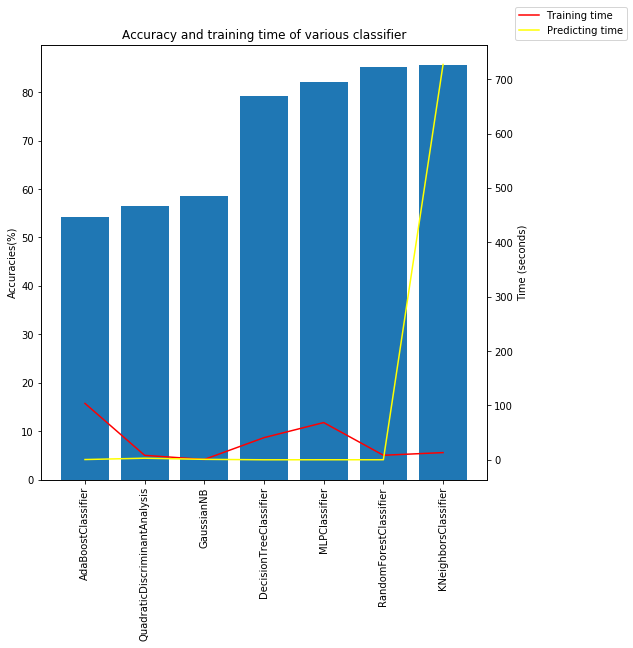

Average training time is 34.8s
Average accuracy is 71.6%


In [286]:
def plot_graph(x_title, x_labels, title, accuracies, training_times, predicting_times):
    # Plot accuracy
    fig , ax1 = plt.subplots()
    fig.set_size_inches(8, 8)
    ax1.set_title(title)
    ax1.set_ylabel('Accuracies(%)')
    ax1.set_xlabel(x_title)
    ax1.bar(x_pos, accuracies)
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(x_labels, rotation=90)


    # Plot training time
    ax2 = ax1.twinx()
    ax2.set_ylabel('Time (seconds)')
    ax2.plot(training_times, color="red", label='Training time')

    # Plot predicting time
    ax2.plot(predicting_times, color="yellow", label="Predicting time")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=3)
    plt.show()
    print(f"Average training time is {sum(training_times)/len(training_times):2.3}s")
    print(f"Average accuracy is {sum(accuracies)/len(accuracies):2.3}%")

from operator import itemgetter
benchmark_results = sorted([
    r_KNeighborsClassifier,
    r_DecisionTreeClassifier,
    r_GaussianNB,
    r_MLPClassifier,
    r_RandomForestClassifier,
    r_AdaBoostClassifier,
    r_QuadraticDiscriminantAnalysis
], key=itemgetter('accuracy'))

classifiers = [x["classifier"] for x in benchmark_results]
x_pos = np.arange(len(classifiers))
accuracies = [x["accuracy"] for x in benchmark_results]
training_times = [x["training_time"].total_seconds() for x in benchmark_results]
predicting_times = [x["predicting_time"].total_seconds() for x in benchmark_results]

plot_graph("", classifiers, "Accuracy and training time of various classifier", 
           accuracies, training_times, predicting_times)


## What can we say about the graph?
From the graph above we can see that the classifier with the best accuracy is KNeighbors, but we can see that it is using a horrific 700s for predicting test data (over 11 minutes！). On the contrary, all of the other classifier take less than 10s to do the prediction.  
This is because there are actually no training is done for KNeighborsClassifier, all it do is comparing each test data against every train data, thus the terrific predicting time. Meanwhile, the other classifier is really building a model when trained with the data, thus their predicting time is lightning fast.

## Conclusion
From my point of view, I thought that the RandomForestClassifier is the best in this situation, because it have top accuracy, and one of the least training time and predicting time. **But does that means RandomForest is good for every case?** *The answer is NO.* It reallys depends on how your data looks like. Just like spoon is good for taking soup, while chopstick is good for grabbing veges. We cannot say that spoon is better than chopstick or vice versa. In the same way, we cannot say some classifier is always better than the other classifier.



# *Time to tune those classifiers*!
In this section, we will play with the parameters of the following classifier:
- DecisionTree
- MLP (Multi-layer Preceptron / neural network)

We will change their default parameter to see if we can get better results.

In [262]:
from sklearn.neural_network import MLPClassifier
def hidden_layer(n):
    return lambda: MLPClassifier(hidden_layer_sizes=(n,))

hidden_layer_counts = [10, 25, 40, 55, 70, 85, 100]

results = []
for n in hidden_layer_counts:
   results.append(benchmark(hidden_layer(n)))



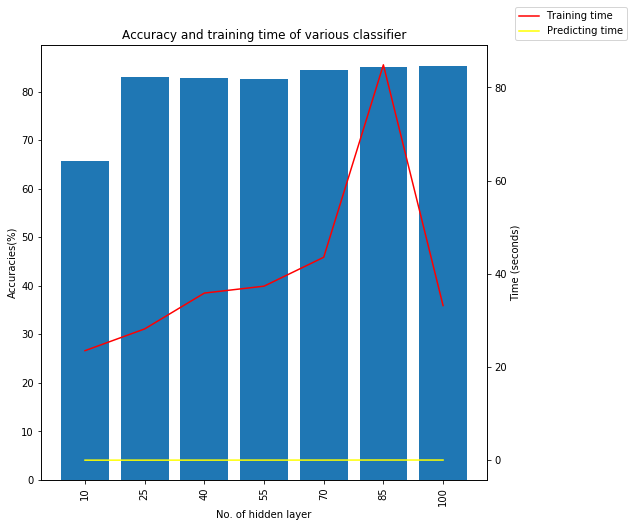

Average training time is 40.9s
Average accuracy is 81.3%


In [283]:
accuracies = [ x["accuracy"] for x in results]
training_times = [ x["training_time"].total_seconds() for x in results]
predicting_times = [ x["predicting_time"].total_seconds() for x in results]
plot_graph("No. of hidden layer", hidden_layer_counts, accuracies, training_times, predicting_times)